#Task 6
## K-Nearest Neighbors (KNN) Classification




##Objective: Understand and implement KNN for classification problems.




##Importing Libraries and Loading Data


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load data
df = pd.read_csv('/content/Iris.csv')
X = df.drop(columns=['Species'])
y = df['Species']

##Initial Data Exploration

In [3]:
# Display the first few rows of the dataset
print(df.head())



   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# Check for missing values
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
# Get basic statistics of the dataset
print(df.describe())


               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


##Normalize features

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##Cross-validation for different values of k

In [7]:
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    accuracies.append(scores.mean())

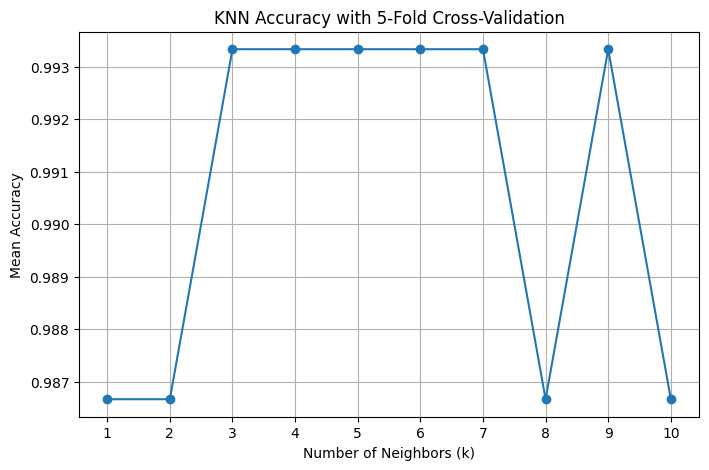

In [8]:
# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy with 5-Fold Cross-Validation')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

##Finding best K value

In [9]:
best_k = k_values[np.argmax(accuracies)]
print(f"Best k based on cross-validation: {best_k}")

Best k based on cross-validation: 3


##Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


##  KNN for Best K

In [11]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

##Confusion Matrix

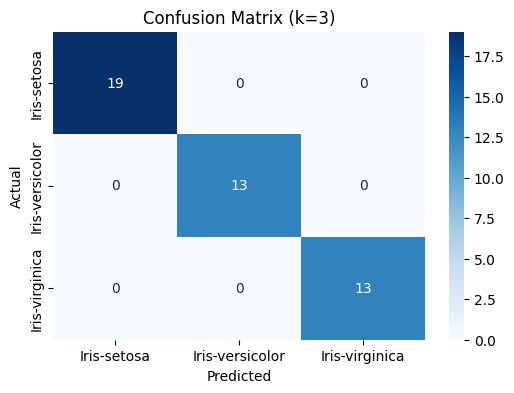

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.title(f'Confusion Matrix (k={best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


##Decision boundary using Petal Length and Petal Width

In [13]:
feature1 = 2  # Petal Length
feature2 = 3  # Petal Width
X_vis = X_scaled[:, [feature1, feature2]]

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.3, random_state=42)
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

KNeighborsClassifier(n_neighbors=3)

##Meshgrid for decision surface

In [18]:
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z_labels = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
le = LabelEncoder()
Z_numeric = le.fit_transform(Z_labels)
Z = Z_numeric.reshape(xx.shape)



## Plot decision boundary

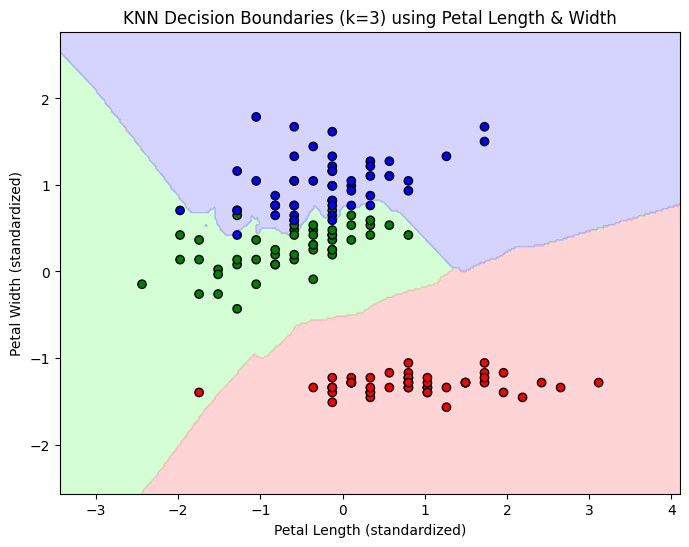

In [19]:
plt.figure(figsize=(8, 6))
colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=pd.factorize(y)[0], edgecolor='k',
            cmap=ListedColormap(['red', 'green', 'blue']))
plt.title(f'KNN Decision Boundaries (k={best_k}) using Petal Length & Width')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.show()